In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir(r"C:\Users\intel\OneDrive\Desktop\traffic sign recognition")
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential , load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import warnings 
warnings.filterwarnings('ignore') 


In [2]:
data = []
labels = []
#We have 43 classes
classes = 43
current_path = os.getcwd()

In [3]:
for i in range(classes):
    path = os.path.join(current_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)
             

## Converting Lists into arrays

In [4]:
data = np.array(data)
labels = np.array(labels)

## Save labels and data for future use

In [5]:
os.mkdir('training')
np.save('./training/data',data)
np.save('./training/target',labels)

## load data & labels

In [6]:
data = np.load('./training/data.npy')
labels = np.load('./training/target.npy')

In [7]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [8]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 0)

In [9]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


## convert labels to onehot encoding

In [10]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

## Model building

In [11]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu', input_shape = x_train.shape[1:]))
model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(rate = 0.25))
model.add(Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate = 0.25))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(rate = 0.5))
# we have 43 classes that's why we have defined 43 in Dense
model.add(Dense(43, activation = 'softmax'))

In [12]:
# Compilation of the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [13]:
epochs = 20
history = model.fit(x_train, y_train, batch_size = 32, epochs = epochs, validation_data=(x_test,y_test))

Epoch 1/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 27s 25ms/step - accuracy: 0.3228 - loss: 3.2147 - val_accuracy: 0.9013 - val_loss: 0.4087
Epoch 2/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.8225 - loss: 0.6206 - val_accuracy: 0.9496 - val_loss: 0.1728
Epoch 3/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.8899 - loss: 0.3800 - val_accuracy: 0.9665 - val_loss: 0.1160
Epoch 4/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - accuracy: 0.9153 - loss: 0.3093 - val_accuracy: 0.9699 - val_loss: 0.1078
Epoch 5/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9216 - loss: 0.2677 - val_accuracy: 0.9802 - val_loss: 0.0713
Epoch 6/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.9270 - loss: 0.2695 - val_accuracy: 0.9763 - val_loss: 0.0807
Epoch 7/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 28s 28ms/step - accuracy: 0.9373 - loss: 0.2279 - val_accuracy: 0.9825 - val_loss: 0.0646
Epoch 8/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - accuracy: 0.9388 - loss: 0.2209 - 

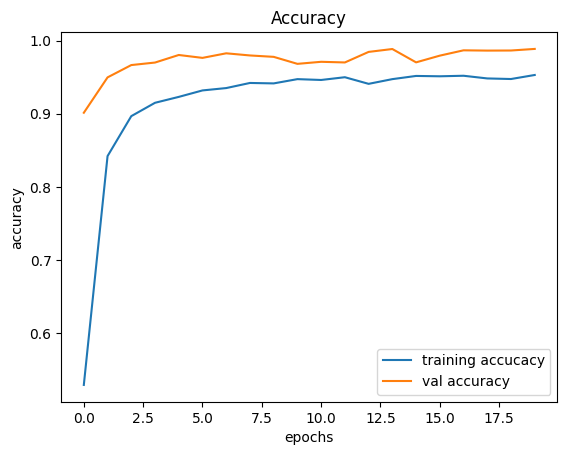

In [14]:
plt.figure(0)
plt.plot(history.history['accuracy'], label = 'training accucacy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

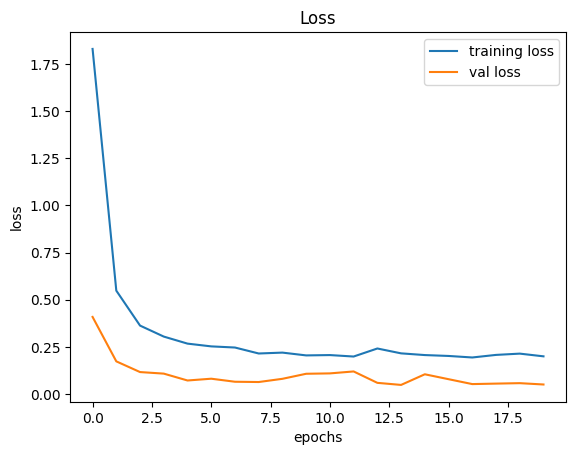

In [15]:
# loss
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

## Testing

In [16]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test['ClassId'].values
    imgs = y_test["Path"].values
    data = []
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    x_test = np.array(data)
    return x_test,label

In [18]:
x_label,label = testing("C:/Users/intel/OneDrive/Desktop/traffic sign recognition/Test.csv")

In [19]:
y_pred = model.predict(x_test)
y_pred

246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


array([[0.0000000e+00, 1.5042467e-20, 3.3195064e-26, ..., 4.1345379e-17,
        9.0959064e-23, 1.1298469e-22],
       [7.0546845e-26, 1.3828952e-14, 6.3224738e-19, ..., 1.5879443e-23,
        2.6184609e-28, 1.0429503e-30],
       [7.3281144e-38, 8.2671691e-25, 8.6902258e-27, ..., 5.6730508e-27,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 7.6909890e-25, 2.7942297e-32, ..., 3.3920722e-27,
        5.8195774e-36, 0.0000000e+00],
       [0.0000000e+00, 1.5312135e-21, 2.3202178e-35, ..., 4.2330073e-31,
        0.0000000e+00, 1.7256589e-37],
       [4.8177724e-05, 1.3106022e-03, 7.5802076e-05, ..., 7.4935960e-09,
        4.9625021e-14, 1.6139051e-15]], dtype=float32)

## Accuracy with the test data

In [ ]:
'''from sklearn.metrics import accuracy_score
print(accuracy_score(label, y_pred))'''

In [20]:
print(f"Shape of x_test: {x_test.shape}")
print(f"Length of true labels (label): {len(label)}")
print(f"Length of predicted labels (y_pred): {len(y_pred)}")


Shape of x_test: (7842, 30, 30, 3)
Length of true labels (label): 12630
Length of predicted labels (y_pred): 7842


In [21]:
model.save("./training/TSR.h5")